In [1]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [10,10]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.5)
    plt.show()
    return

In [2]:
## necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import math

In [3]:
## parameters 
m = 100 #years
n = 50 ## number of grid points is n*n
recovery = 10 # time for destroyed land to recover
res = 2 # 2 km 
melt_vol = 0
ocean_level = [1] # initializes ocean level to reference point (1) 
beta = 210*10**(-6) #https://pressbooks.bccampus.ca/collegephysics/chapter/thermal-expansion-of-solids-and-liquids/

In [4]:
## create grid 
##############################################################  setup
ocean=np.array([14/255,0/255,117/255])   
shallowocean =np.array([116/255,132/255,252/255])
glacier=np.array([191/255,232/255,255/255]) ## ice on land (glacier)
icefloat=np.array([0.9,0.9,1])  ## sea ice  
land=np.array([0/255,122/255,65/255]) 
lowland=np.array([255/255,210/255,150/255])
destroyedland=np.array([1,0,0]) # for later
null = np.array([1,1,1])

geography={'ocean':ocean,'shallowocean':shallowocean,'glacier':glacier,'icefloat':icefloat,\
      'land':land,'lowland':lowland,'destroyedland':destroyedland, 'null':null}


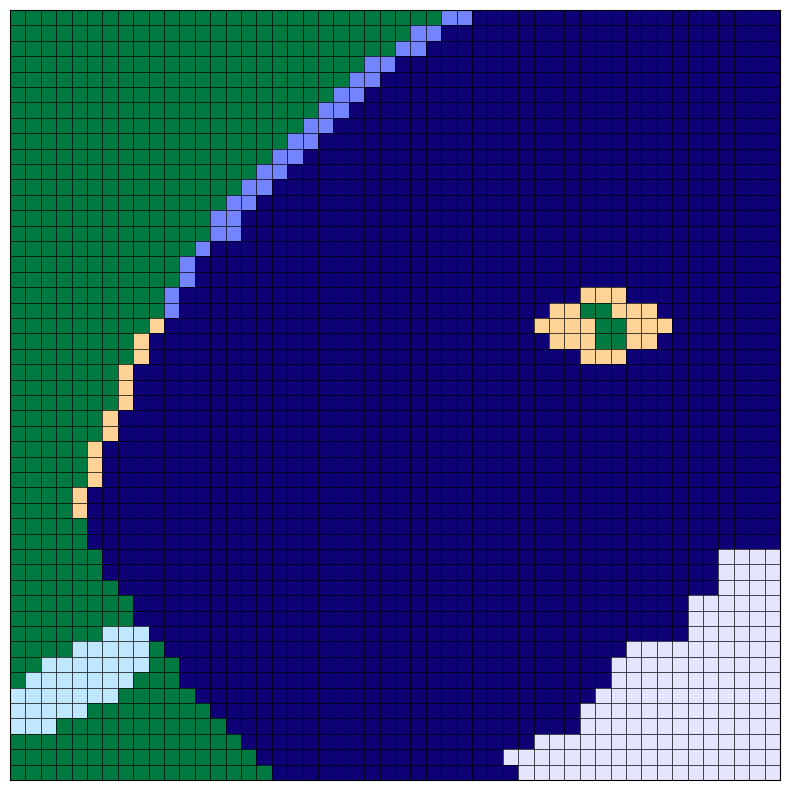

In [5]:
################################################## draw earth

background=[[ocean]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all ocean
#plot_grid(clim_model)

def is_equal(x,y,col):  ## checks if colour of a cell in the model grid is col
    if np.all(clim_model[x,y]==np.array(col)):
        return True
    return False

def create_island():
    for x in range(50):
        for y in range(50):
            if (x-20)**2/2+(y-38)**2/8<=2.3:
                clim_model[x,y]=lowland
    clim_model[20,38]=land
    clim_model[19,38]=land
    clim_model[21,38]=land
    clim_model[21,39]=land
    clim_model[20,39]=land
    clim_model[19,37]=land
    return

def create_arctic():
    for x in range(50):
        for y in range(50):
            if np.sin(y)+1.1*x+y+0.8*np.sin(2*x)>=86:  # and x**2+y**2>3600:
                clim_model[x,y]=icefloat
    return

def create_land1():               
    for x in range(50):
        for y in range(50):
            if (x-n)**2/4+(y-n)**2/3>=800:
                clim_model[x,y]=land
    return

create_land1()
   
for x in range(20):
    for y in range(50):
        if is_equal(x,y,ocean) \
        and (np.all(clim_model[x-1,y]==np.array(land)) \
        or np.all(clim_model[x,y-1]==np.array(land))):
            clim_model[x,y]=shallowocean
            if y<49 and x<15:
                clim_model[x,y+1]=shallowocean

for x in range(20,34):
    for y in range(50):
        if is_equal(x,y,ocean) \
        and (np.all(clim_model[x-1,y]==np.array(land)) \
        or np.all(clim_model[x,y-1]==np.array(land))):
            clim_model[x,y]=lowland

def create_land2():
    for x in range(50):
        for y in range(50):
            if (x-0)**2/4+(y-n)**2/3>=970:
                clim_model[x,y]=land
    return

create_land2()
            
for x in range(50):
    for y in range(50):
        if (x-43)**2+(x-43)*(y-4)+0.5*(y-4)**2<=5:
            clim_model[x,y]=glacier

create_island()
create_arctic()

plot_grid(clim_model)

################################################## end draw earth



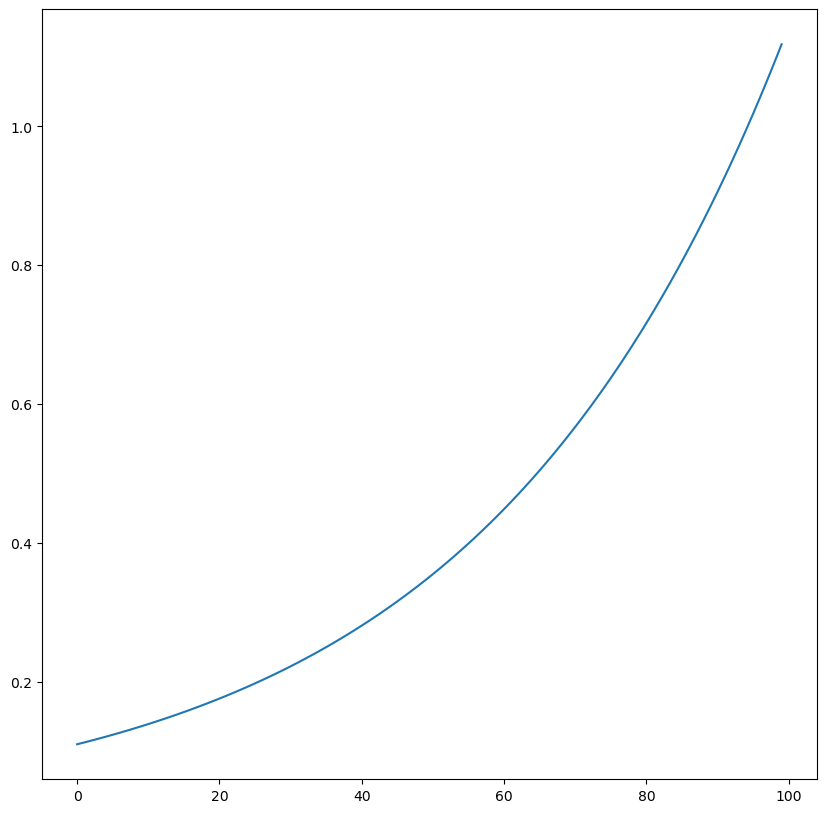

In [6]:
## Temp Inc Due to GHG
## Data from 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
GHGtemp_over_time=[]
def GHG_effect(t):
    for i in range(1,t+1):
        GHG_temp = 0.1077*math.exp(0.0234*i)
        GHGtemp_over_time.append(GHG_temp)
    return GHGtemp_over_time

GHG_temp = GHG_effect(m)
plt.plot(GHG_temp)

In [7]:
## Temp Inc Due to combined solar and volcanic activity
## Data from 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
init_nat_temp = 0
nattemp_over_time=[]
nattemp_over_time.append(init_nat_temp)
def natural_effect(t):
    i = 1
    while i<100:
        natural_temp = (2.788e-10)*(i**5)-3.017e-8*(i**4)-1.161e-6*(i**3)+0.0001648*(i**2)-0.002152*i
        nattemp_over_time.append(natural_temp)
        i = i + 1
    if t>100: # if t is greater than 100, the list begins to repeat itself
        nattemp_over_time.extend(nattemp_over_time[1:t-100])
    return nattemp_over_time
    
nat_temp = natural_effect(m)

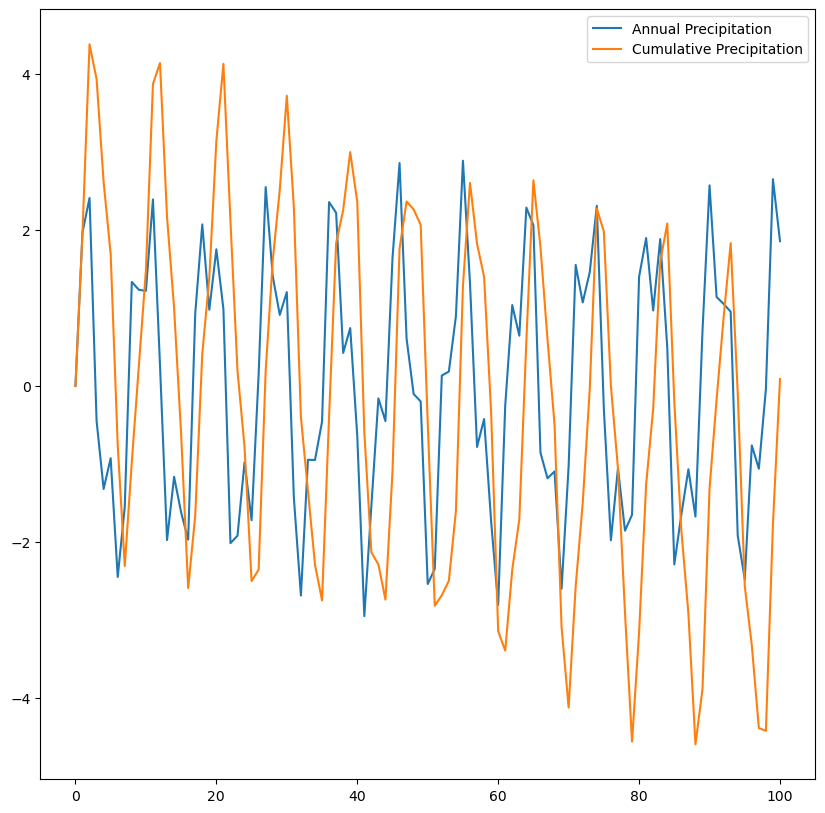

In [8]:
# hypothetical precipitation data
precip_init = 0
precip_over_time = []
precip_over_time.append(precip_init)
def precip(t):
    for i in range(t):
        precip_amt = np.sin(2*i)+2*np.cos(0.7*i)-0.03
        precip_over_time.append(precip_amt)
    return precip_over_time

def precip_intensity(t):
    precip(t)
    intensity_sum = [0]*(len(precip_over_time))
    for i in range(len(precip_over_time)):
        intensity_sum[i] = intensity_sum[i-1] + precip_over_time[i]
    return intensity_sum

precip_int = precip_intensity(m)
plt.plot(precip_over_time)
plt.plot(precip_int)
plt.legend(['Annual Precipitation','Cumulative Precipitation'])


In [9]:
##### turning lists into matrices
## GHG Temperature Anomaly Contribution 
GHG_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            GHG_matrix_over_time[i,j,t] = GHG_temp[t]
            
#print(GHG_matrix_over_time)

## Natural Temperature Anomaly Contribution
nat_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            nat_matrix_over_time[i,j,t] = nat_temp[t]

## Precipitation Intensity
precip_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            precip_matrix_over_time[i,j,t] = precip_int[t]
            
print(precip_matrix_over_time[0,0,2])

4.378981801394659


In [10]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

print(what_is(2,2))
print(what_is(1,2))
print(what_is(2,0))
print(what_is(0,0))

################################# CHANGES MADE FROM HERE

def what_is_general(which_model,x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(which_model[x,y]==np.array(v)):
            whatis=k
    return whatis


land
land
land
land


In [11]:
## Who are your neighbours function
## inquires about the nature of a cells surroundings
## PADDING
def padding(x):
    null1 = np.array([[null]*n])
    null2 = np.array([[null]]*(n+2))
    expand1 = np.concatenate((x, null1), axis = 0) #adds row to bottom
    expand2 = np.concatenate((null1, expand1), axis = 0) #adds row to top
    expand3 = np.concatenate((expand2, null2), axis = 1) #adds last col
    final = np.concatenate((null2, expand3), axis = 1) #adds first col
    return final

def neighbours(x, comp):
    y = padding(x)
    glacier_count = np.zeros((n+2,n+2))
    for i in range(1,n+1):
        for j in range(1,n+1):
            if what_is_general(y,i-1,j-1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i-1,j)==comp: 
                glacier_count[i,j] += 1
            if what_is_general(y,i-1,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j-1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i,j-1)==comp:
                glacier_count[i,j] += 1
    return glacier_count[1:n+1,1:n+1]       

In [12]:
## Melting Glaciers
init_glacier_h = 1.5  #km
glacier_h = np.array([[0]*n]*n, dtype = float)
for i in range(n):
    for j in range(n):
        if what_is_general(clim_model,i,j) == 'glacier':
            glacier_h[i,j] = init_glacier_h
melt_rate = 0.00056 #km/yr #https://doi-org.libaccess.lib.mcmaster.ca/10.1038/s41586-021-03436-z
print(glacier_h)
surf_area =  res*res #surface area of one pixel in km^2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
## Counts total number of components in a cell
def count(model, comp): 
    ctr = 0
    for i in range(n):
        for j in range(n):
            if what_is_general(model,i,j) == comp:
                ctr = ctr + 1
    return ctr

count(clim_model, 'ocean')

1674

1
1.000000130594327
1.0000121172212812
1.000035958509434
1.0000716529593905
1.0001191989508718
1.0001785947497868
1.0002498385152958
1.0003329283068674
1.0004278620913283
1.0005346377499114
1.000653253085299
1.0007837058286664
1.0009259936467234
1.0010801141487597
1.0012460648936916
1.0014238433971132
1.0016134471383538
1.0018148735675418
1.0020281201126777
1.002253184186717
1.0024900631946645
1.0027387545406805
1.002999255635203
1.003271563902085
1.0035556767857488
1.0038515917583577
1.0041593063270111
1.0044788180409574
1.0048101244988328
1.0051532233559228
1.0055081123314513
1.0058747892158955
1.0062532518783311
1.0066434982738073
1.0070455264507532
1.0074593345584197
1.007884920854354
1.0083222837119121
1.0087714216278085
1.0092323332297066
1.0097050172838484
1.010189472702729
1.0106856985528134
1.0111936940623008
1.0117134586289342
1.012244991827861
1.0127882934195436
1.0133433633577202
1.0139102017974233
1.0144888091030495
1.0150791858564892
1.0156813328653131
1.0162952511710204


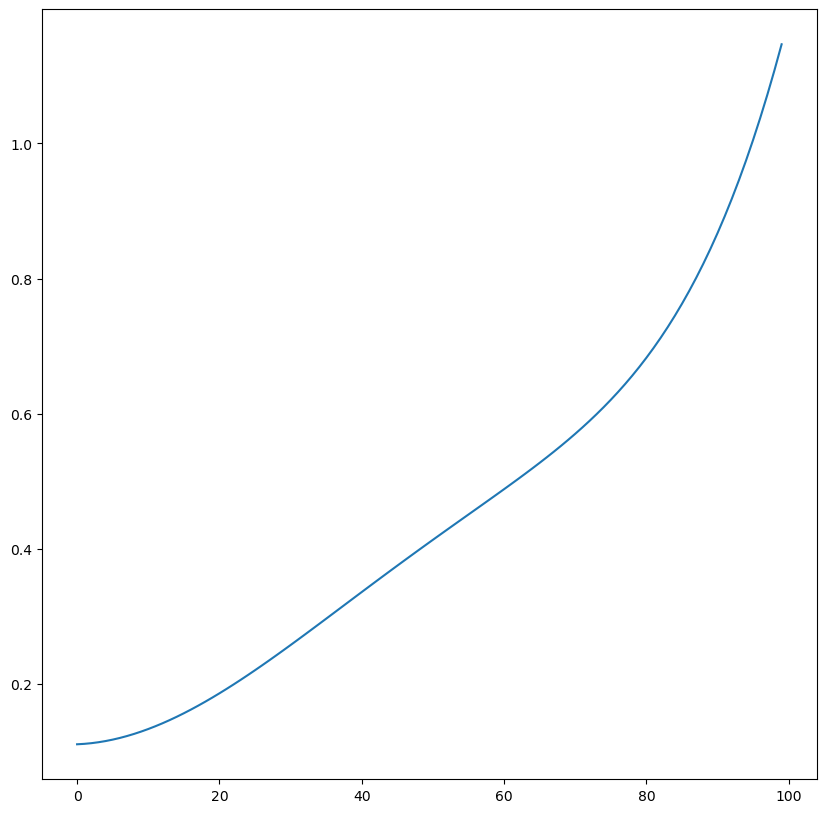


 time 0


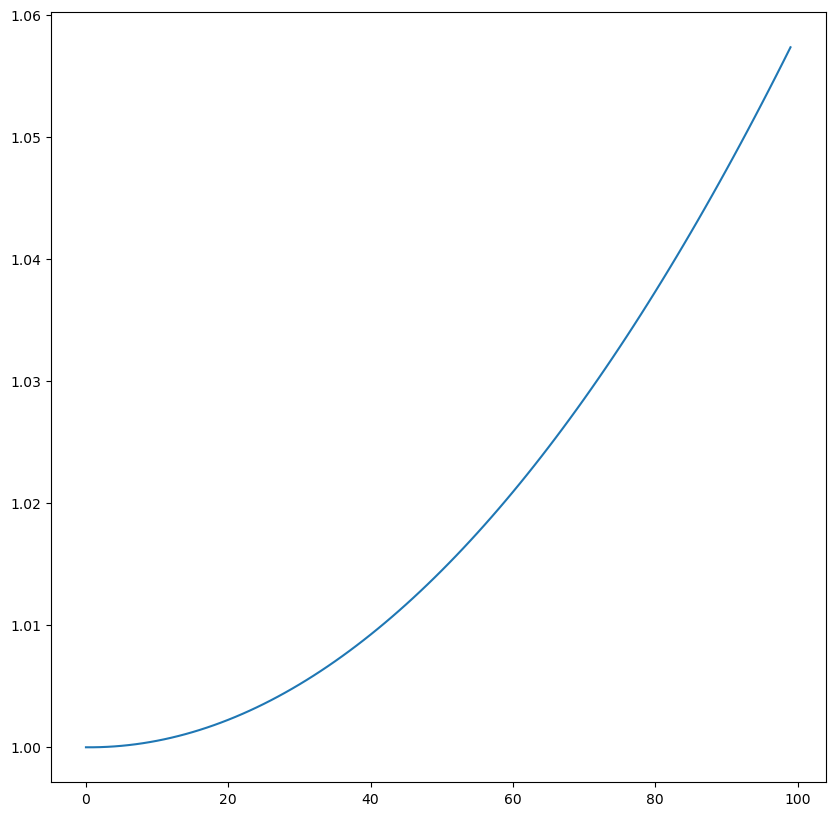

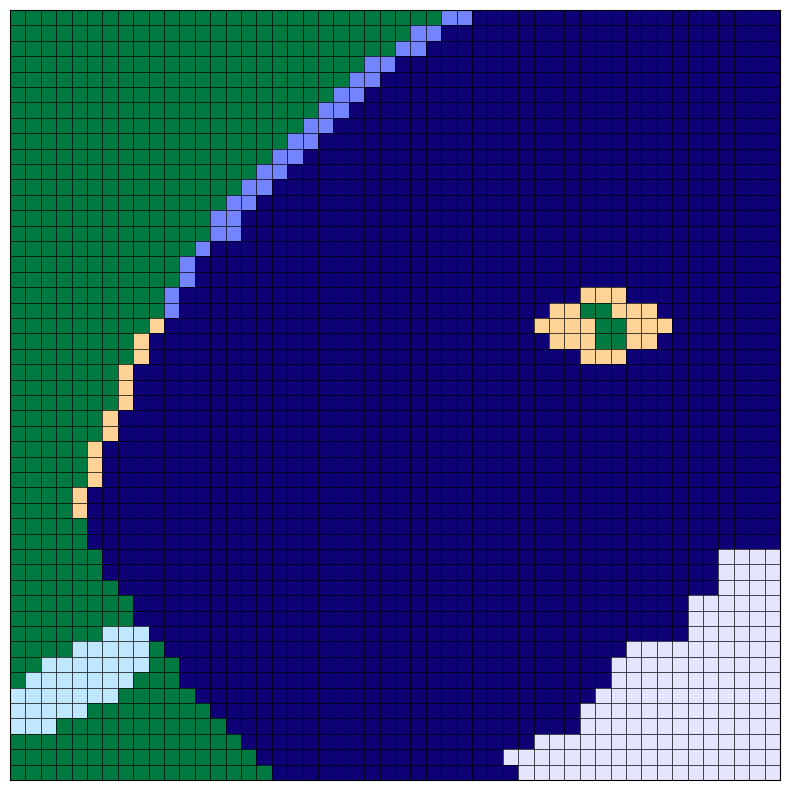

land




time 1


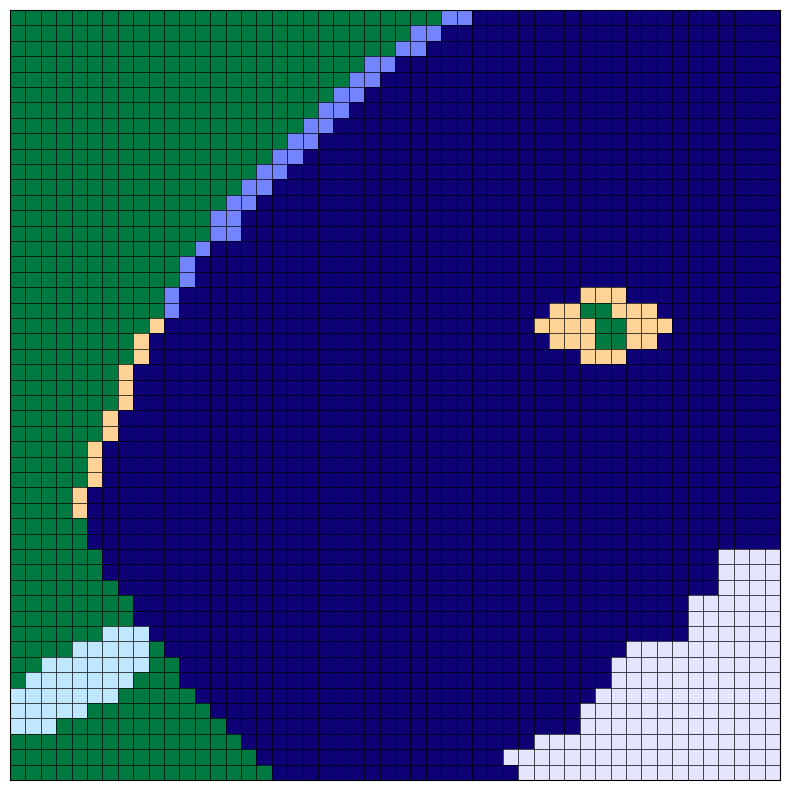

land




time 2


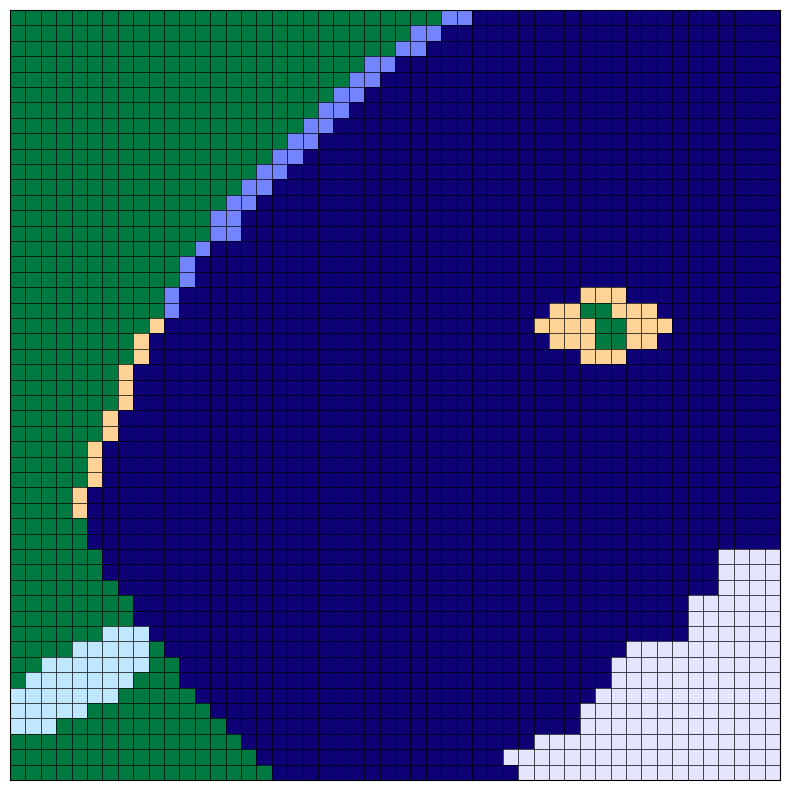

land






In [14]:
model_over_time=[]
climm_model=clim_model.copy()
model_over_time.append(climm_model)
time_burned = np.zeros((n,n))

for t in range(m-1):
    num = count(clim_model, 'ocean')
    ocean_vol = (res**2)*ocean_level[t]*num
    delta_vol = beta*ocean_vol*((GHG_temp[t+1]+nat_temp[t+1]) - (GHG_temp[t]+nat_temp[t]))
    ocean_vol = ocean_vol + delta_vol + melt_vol
    ocean_level.append(ocean_vol/(num*res**2))
    print(ocean_level[t])
    for i in range(n):
        for j in range(n):
            g=what_is_general(climm_model,i,j)        
            if g=='land':
                if precip_matrix_over_time[i,j,t] < -2.3 and \
                       GHG_matrix_over_time[i,j,t]+nat_matrix_over_time[i,j,t] > 0.8 and random.randint(0,100)>98:  
                    clim_model[i,j] = destroyedland
                else:
                    clim_model[i,j] = land  # testing
            elif g=='destroyedland':
                time_burned[i,j] = time_burned[i,j] + 1
                if time_burned[i,j] == recovery:
                    clim_model[i,j] = land
                else:
                    clim_model[i,j]=destroyedland
            elif g=='glacier':
                if glacier_h[i,j] < 0.001:
                    clim_model[i,j] = land
                alpha = 1.1 - 0.025*(neighbours(clim_model, 'glacier'))[i,j]  ## adjusting for edge of glacier vs middle
                melt_height = alpha*melt_rate
                glacier_h[i,j] = glacier_h[i,j]-melt_height
                melt_vol = melt_vol + (res**2)*melt_height
            elif g=='lowland':
                if neighbours(clim_model, 'ocean')[i,j]>0 and ocean_level[t]>1.0001:
                        clim_model[i,j] = shallowocean
                    
    climm_model=clim_model.copy()
    model_over_time.append(climm_model)


plt.plot(np.add(GHG_temp, nat_temp))
plt.show()
plt.plot(ocean_level)

#print(glacier_h)
print('\n time 0')
plot_grid(model_over_time[0])
print(what_is_general(model_over_time[0],1,2))
print(''); print('');print(''); print('')

print('time 1')
plot_grid(model_over_time[1])
print(what_is_general(model_over_time[1],1,2))          
print(''); print('');print(''); print('')   

print('time 2')
plot_grid(model_over_time[2])
print(what_is_general(model_over_time[2],1,2))
print(''); print('');print(''); print('')



time 88


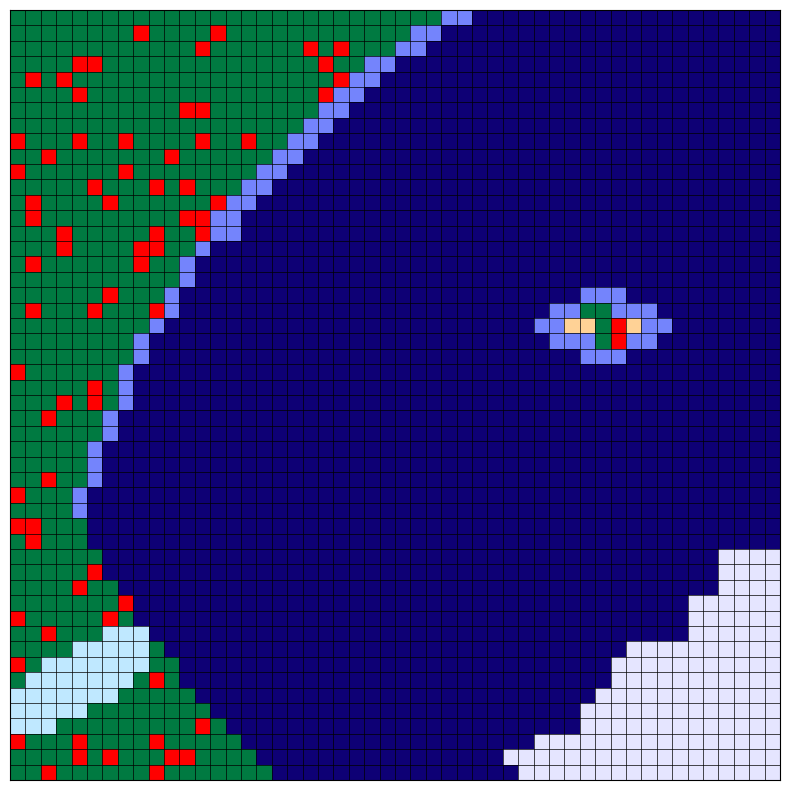

land




time 89


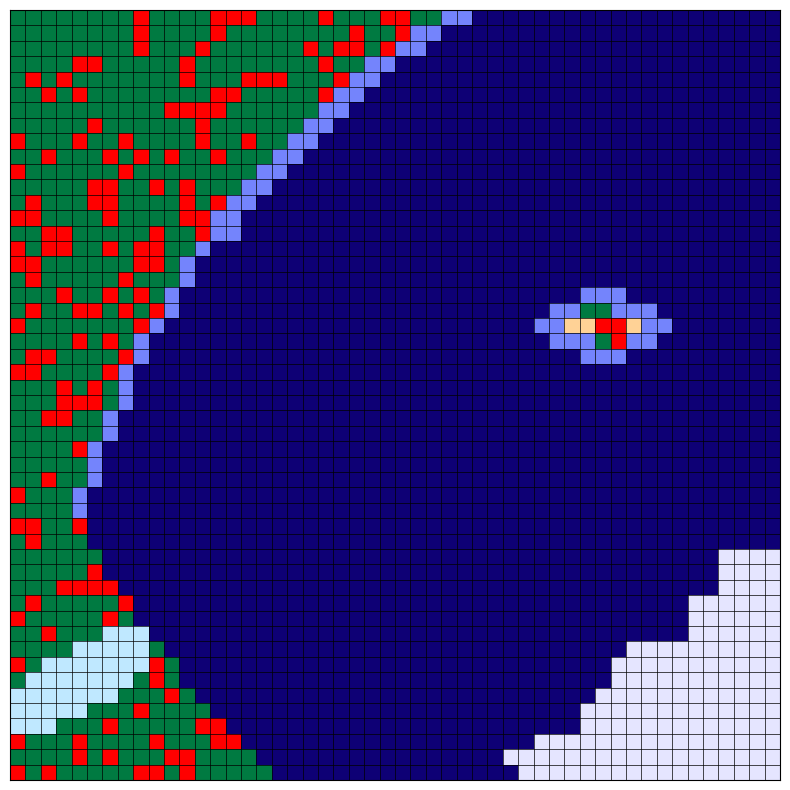

land




time 90


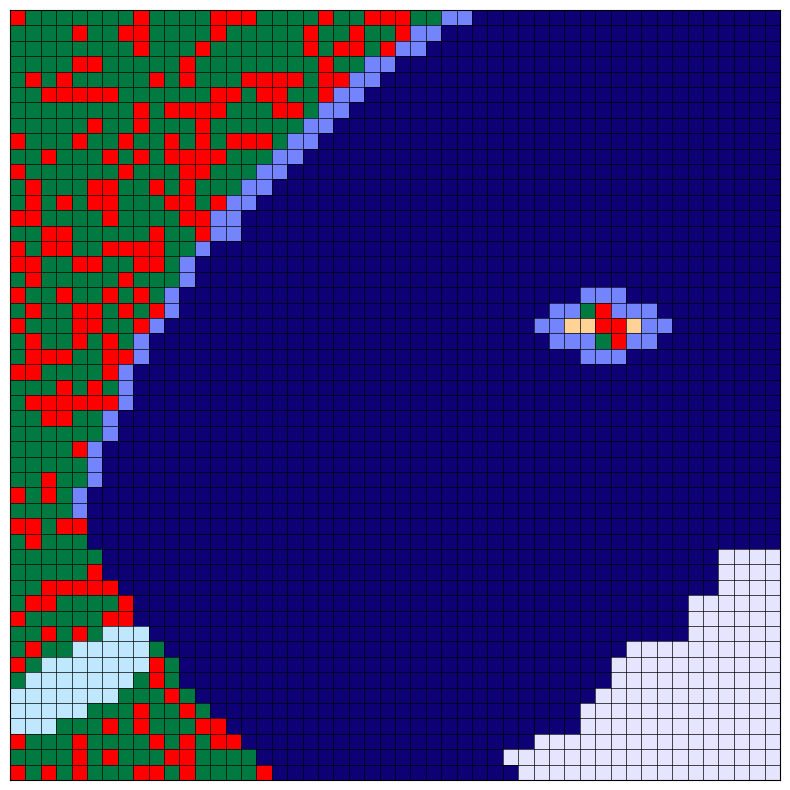

land




time 91


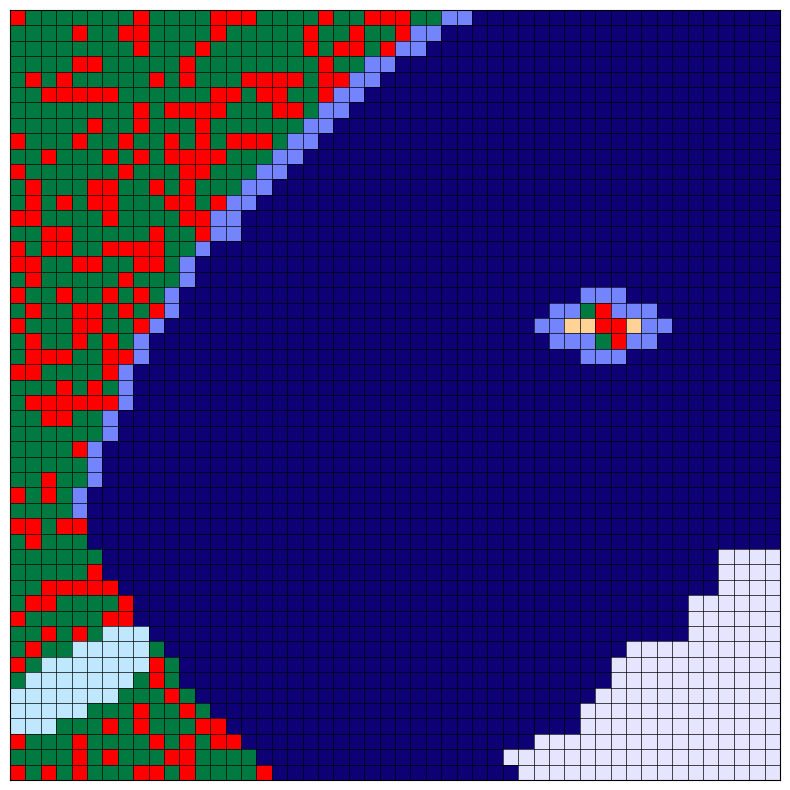

land




time 92


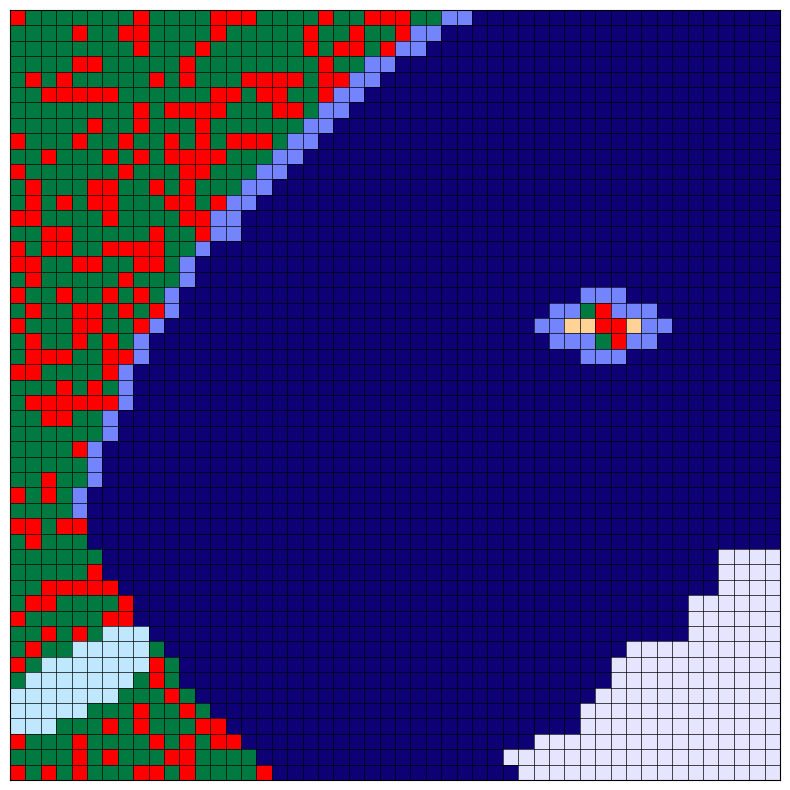

land




time 93


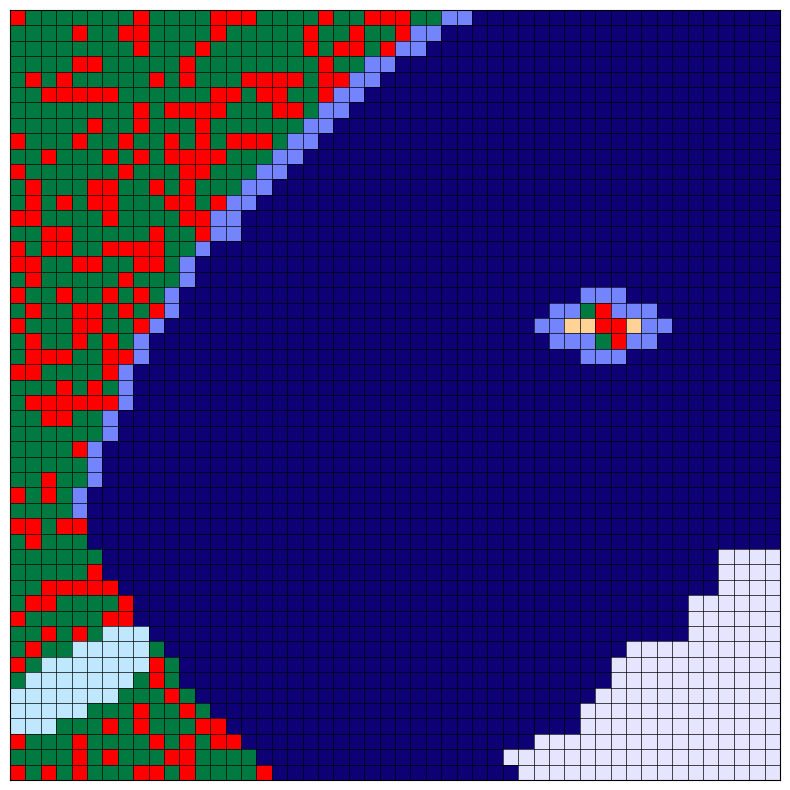

land




time 94


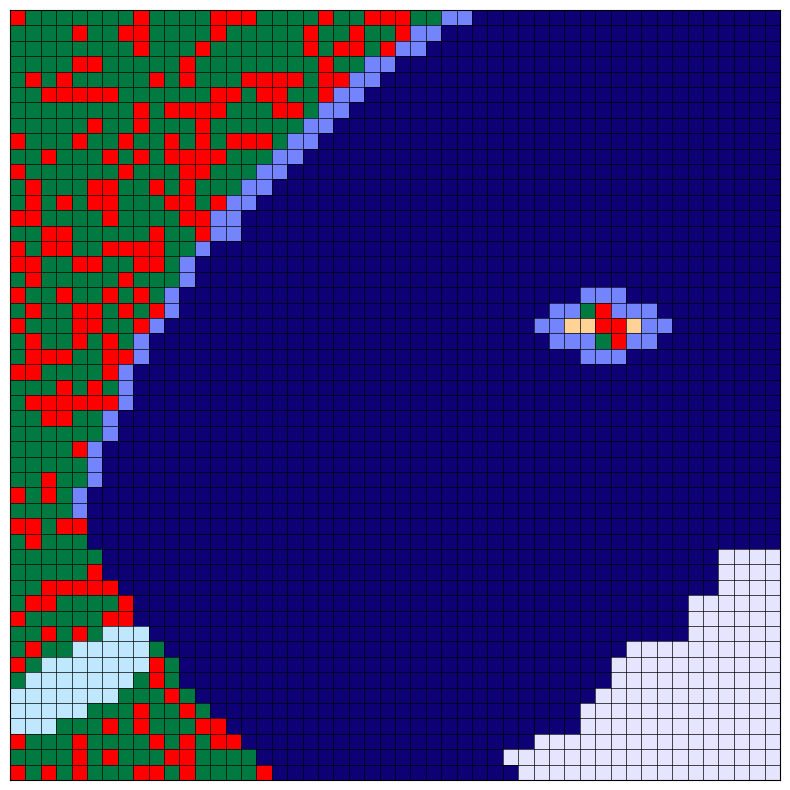

land




time 95


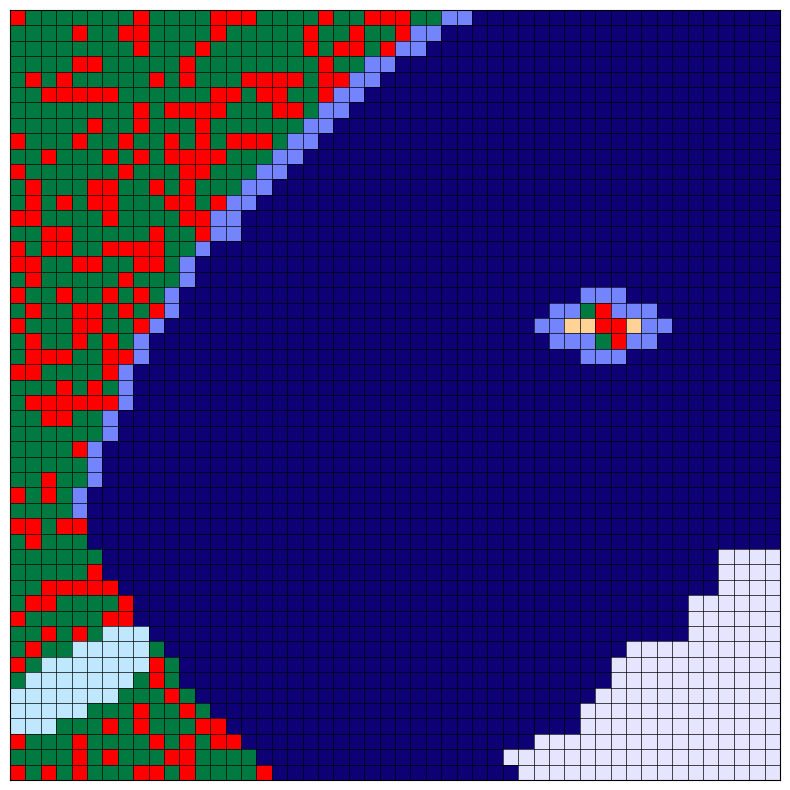

land




time 96


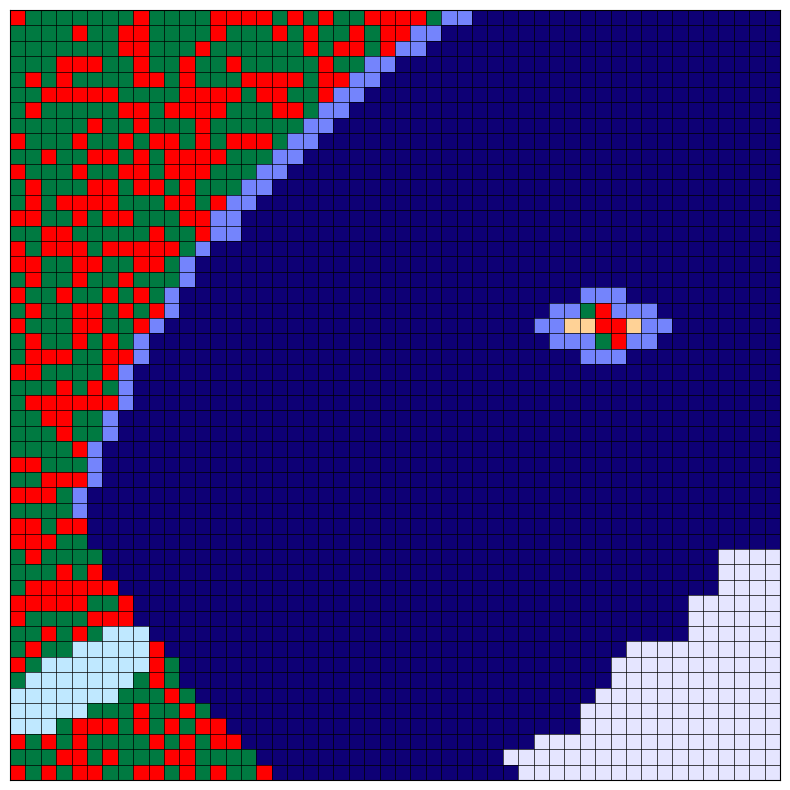

land




time 97


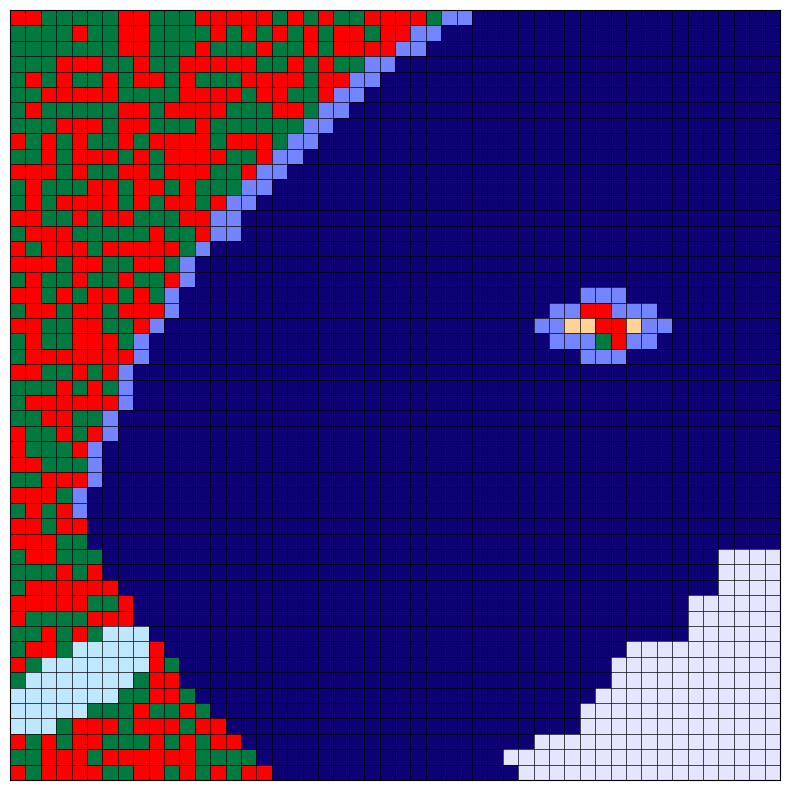

land




time 98


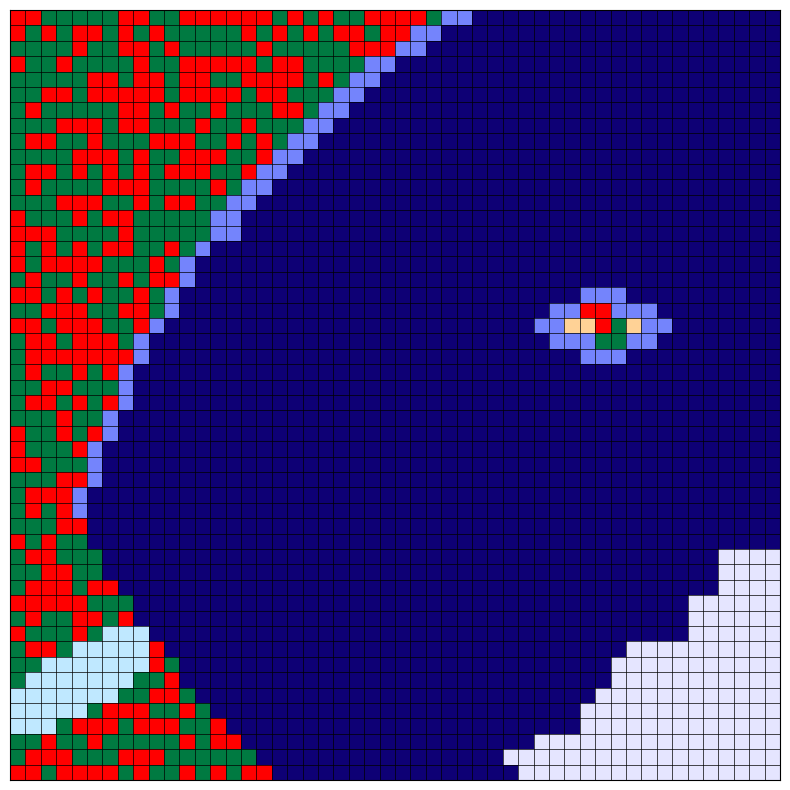

destroyedland




time 99


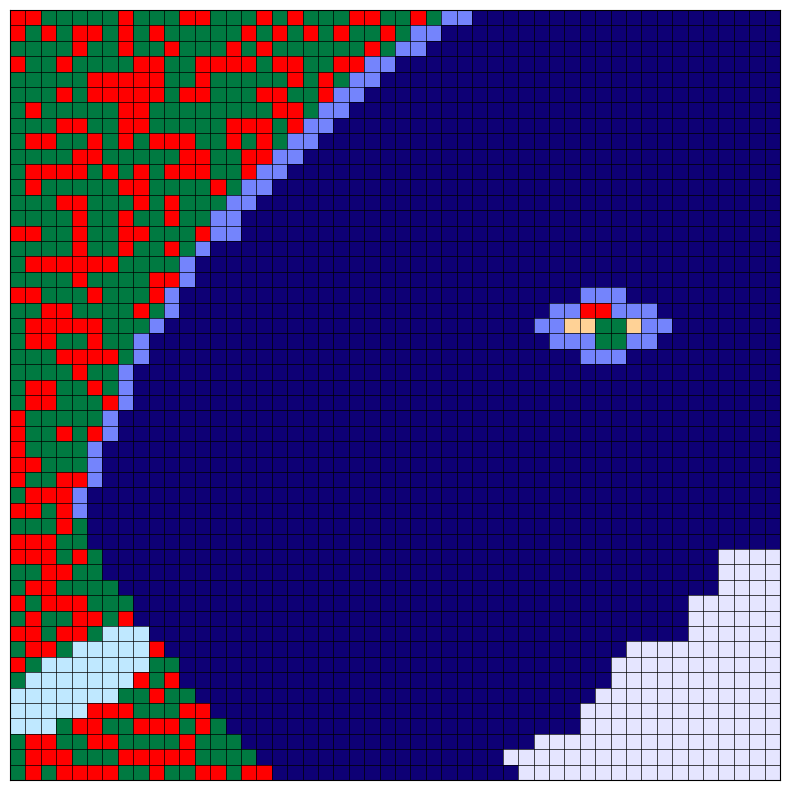

destroyedland






In [25]:
check_time=88
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=89
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=90
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=91
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=92
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=93
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=94
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=95
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=96
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=97
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=98
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=99
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

In [16]:
################### extras

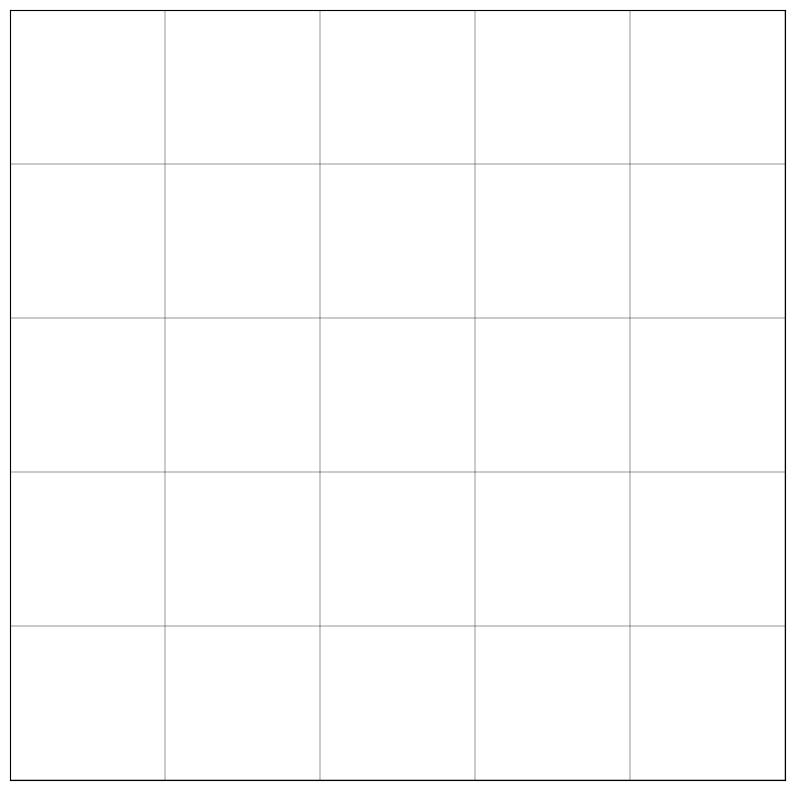

In [17]:
##########  plotting
fig, ax = plt.subplots()
#ax.imshow(model_over_time[99])

# Set ticks and labels (not really needed)
#ax.set_xticks(np.arange(0.5, n, 1))
#ax.set_yticks(np.arange(0.5, n, 1))
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
# add grid lines  
ax.grid(color='black', linewidth=0.3)
plt.show() 

In [18]:
print(model_over_time[0])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 ...

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]


In [19]:
print(model_over_time[1])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 ...

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]


In [20]:
print(model_over_time[2])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 ...

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]


In [21]:
print(model_over_time[96])

[[[1.         0.         0.        ]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 ...

 [[1.         0.         0.        ]
  [0.         0.47843137 0.25490196]
  [1.         0.         0.        ]
  ...
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]


In [22]:
print(model_over_time[97])

[[[1.         0.         0.        ]
  [1.         0.         0.        ]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  ...
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]
  [0.05490196 0.         0.45882353]]

 ...

 [[1.         0.         0.        ]
  [0.         0.47843137 0.25490196]
  [1.         0.         0.        ]
  ...
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]
  [0.9        0.9        1.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]


In [23]:
A=np.array([[1,2],[3,4]])
B=A
print(A,'\n\n',B)

print('')

A[1,0]=999
print(A,'\n\n',B)

[[1 2]
 [3 4]] 

 [[1 2]
 [3 4]]

[[  1   2]
 [999   4]] 

 [[  1   2]
 [999   4]]


In [24]:
A=np.array([[1,2],[3,4]])
B=A.copy()
print(A,'\n\n',B)

print('')

A[1,0]=999
print(A,'\n\n',B)

[[1 2]
 [3 4]] 

 [[1 2]
 [3 4]]

[[  1   2]
 [999   4]] 

 [[1 2]
 [3 4]]
